### Sheyam Bitar

    
Time Series Modeling

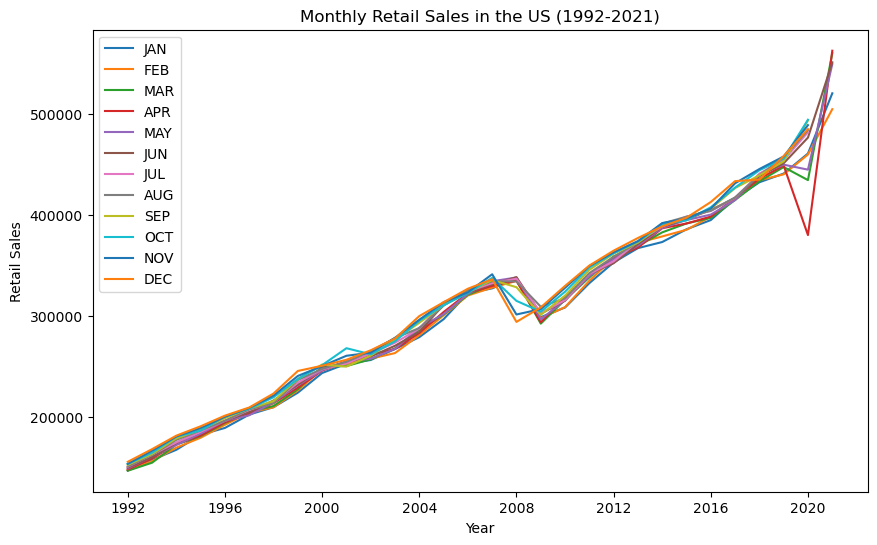

Shape of X_train: (24, 1)
Shape of y_train: (24, 12)
NaN values found in y_train. Removing corresponding rows...
Shape of nan_indices: (24,)
nan_indices: [False False False False False False False False False False False False
 False False False False False  True False False False False False False]
Shape of mean: (12,)
mean: [290243.91304348 291347.60869565 291500.73913043 290238.52173913
 293512.60869565 296069.95652174 297363.73913043 298181.47826087
 299522.34782609 300048.47826087 300587.         301216.2173913 ]
Shape of y_test: (6, 12)
Shape of y_pred: (6, 12)
y_test: [[440751. 439996. 447167. 448709. 449552. 450927. 454012. 456500. 452849.
  455486. 457658. 458055.]
 [327181. 327953. 330579. 329560. 334202. 331076. 332342. 334169. 335442.
  337530. 341133. 336189.]
 [385648. 385157. 391420. 391356. 394718. 395464. 398193. 398105. 396248.
  394503. 396240. 397052.]
 [298673. 297631. 292300. 293614. 296501. 302169. 302802. 309023. 301033.
  304154. 306675. 308413.]
 [243436. 2471

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("us_retail_sales.csv")

#Converting the YEAR column to datetime format
data['YEAR'] = pd.to_datetime(data['YEAR'], format='%Y')

#index
data.set_index('YEAR', inplace=True)

#plotting
plt.figure(figsize=(10,6))
for col in data.columns:
    plt.plot(data.index, data[col], label=col)
plt.title('Monthly Retail Sales in the US (1992-2021)')
plt.xlabel('Year')
plt.ylabel('Retail Sales')
plt.legend(loc='upper left')
plt.show()

#Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.index.values.reshape(-1, 1), data.values, test_size=0.2, random_state=42)

#Print shapes 
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

#Checking for NaN values in y_train
nan_indices = np.isnan(y_train).any(axis=1)
if np.any(nan_indices):
    print("NaN values found in y_train. Removing corresponding rows...")
    X_train = X_train[~nan_indices]
    y_train = y_train[~nan_indices]

#Replacing NaN values with the mean of the column 
## when replaced with zeros the graph was wacky and did not look right as the numbers dropped and lines flattened 

mean = np.nanmean(y_train, axis=0)

# Print shapes and values for debugging
## this is due to a million tries of fixing the data/code 

print("Shape of nan_indices:", nan_indices.shape)
print("nan_indices:", nan_indices)
print("Shape of mean:", mean.shape)
print("mean:", mean)

#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Preprocess X_train to convert datetime to numeric values
X_train_numeric = (X_train - X_train.min()) / np.timedelta64(1, 'D')

#Preprocess X_test to convert datetime to numeric values
X_test_numeric = (X_test - X_train.min()) / np.timedelta64(1, 'D')

# Predict using the model for each month in the test set
y_pred = model.predict(X_test_numeric)

# Print shapes of y_test and y_pred
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Print values of y_test and y_pred
print("y_test:", y_test)
print("y_pred:", y_pred)


# Flatten y_test and y_pred to 1D arrays
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
print("Root Mean Squared Error (RMSE):", rmse)



Observations from the provided code and results:

- Shape of Data: The training data (X_train and y_train) consists of 24 samples, where X_train contains 24 rows and 1 column (representing the time index), and y_train contains 24 rows and 12 columns (representing the monthly retail sales for 12 months).

- NaN Values Handling: There are NaN values present in y_train. The code appropriately identifies and removes the rows with NaN values from both X_train and y_train. Then, it replaces the NaN values with the mean of the respective column.

- Shape of Test Data: The test data (X_test and y_test) consists of 6 samples, where y_test contains 6 rows and 12 columns, similar to y_train.

- Model Prediction: The model predicts the retail sales for each month in the test set. The shape of y_pred matches that of y_test, indicating that the model provides predictions for all samples and all months.

- Root Mean Squared Error (RMSE): The RMSE between the actual and predicted values is calculated. The RMSE value provides a measure of the model's performance in predicting the retail sales.